In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,total_turnover,high,close,open,volume,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23049694.0,23.1326,23.0176,23.0560,995930.0,23.0100,0
2019-01-02 09:40:00,16118445.0,23.0406,22.9640,23.0176,698906.0,22.9103,1
2019-01-02 09:45:00,13180271.0,23.0560,22.9870,22.9640,570908.0,22.9563,2
2019-01-02 09:50:00,18621408.0,23.0560,23.0560,22.9870,807439.0,22.9180,3
2019-01-02 09:55:00,14496614.0,23.1863,23.0176,23.0560,625118.0,23.0023,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Trend.ef = ef
Pair.m = m
PairChain.m = m
PairChain.ef = ef
CenterStrict.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'L':m.Lv1_L, 'ML':Stick.L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'L':m.Lv2_L, 'ML':TrendLv1.L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'L':m.Lv3_L, 'ML':TrendLv2.L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [17]:

Center0 = type('Center0', (CenterStrict,), {'ML': m.findList('st', 0), 'L': m.findList('center', 0), 'openL':[],  'level': 0})
Center0()
Center1 = type('Center1', (CenterStrict,), {'ML': m.findList('st', 1), 'L': m.findList('center', 1), 'openL':[],  'level': 1})
Center1()
Center2 = type('Center2', (CenterStrict,), {'ML': m.findList('st', 2), 'L': m.findList('center', 2), 'openL':[],  'level': 2})
Center2()
Center3 = type('Center3', (CenterStrict,), {'ML': m.findList('st', 3), 'L': m.findList('center', 3), 'openL':[],  'level': 3})
Center3()

Center3(0, 1, 0, 0)

In [18]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv3 = PairChain(3, 'PairChainLv3')

In [19]:
SIG_overlapMv.m, SIG_overlapMv.ef = m, ef
actions = []
level = 1
actions.append({ 'level_num': level, 
            'obj_name': 'TrendLv' +str(int(level)),
            'event_name': 'NEW',
            'obj_p': 'SIG_overlapMv',
            'method': 'any_opp',
            'param': str(level)  })
for ac in actions:
    ef.regAction(**ac)

In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [20]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
   [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x177027b8>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []],
  'center': [[Center0(0, 1, 0, 0)],
   [Center1(0, 1, 0, 0)],
   [Center2(0, 1, 0, 0)],
   [Center3(0, 1, 0, 0)],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x177027b8>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'CLv0_L': [Center0(0, 1, 0, 0)],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 '

In [21]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'updateAll'],
    'obj_p': ['m.Lv1_L[-1]',
     'm.PCLv0_L[0]',
     'Center0',
     'm.PLv0_L[-1]',
     'm.SIG_L[0]'],
    'param': ['', '', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []},
   'NEW_llv': {'method': ['newCenter'],
    'obj_p': ['m.CLv0_L[0]'],
    'param': ['obj="pair", level=0, i=-1']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'newCenter',
     'any_opp'],
    'obj_p': ['m.Lv2_L[-1]',
     'm.PCLv1_L[0]',
     'Center1',
     'm.PLv1_L[-1]',
     'm.CLv0_L[0]

In [22]:
Position.m = m
Position.L = m.position

In [23]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:5.0,[[<frame.Event object at 0x0000000017704588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x00000000178144A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:10.0,[[<frame.Event object at 0x00000000178147B8>]]
(0, PairChainLv0, NEW)
TmIdx:12.0,[[<frame.Event object at 0x0000000017814D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x00000000178140F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x0000000017814780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18.0,[[<frame.Event object at 0x0000000017814CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19.0,[[<frame.Event object at 0x00000000178147B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:20.0,[[<frame.Event object at 0x0000000017814F28>]]
(0, Stick, PEAK)
m.

TmIdx:385.0,[[<frame.Event object at 0x000000001788C2B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:387.0,[[<frame.Event object at 0x000000001788C198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:389.0,[[<frame.Event object at 0x000000001788C518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:22.0748,HL:(22.757050000000003, 23.178625000000004)
New SIG!!!
True
TmIdx:390.0,[[<frame.Event object at 0x000000001788C6A0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:393.0,[[<frame.Event object at 0x000000001788C668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:22.0748,HL:(22.757050000000003, 23.178625000000004)
New SIG!!!
True
TmIdx:393.0,[[<frame.Event object at 0x000000001788C6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:

m.SIG_L[0].updateAll()
TmIdx:562.0,[[<frame.Event object at 0x00000000178A57B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:563.0,[[<frame.Event object at 0x00000000178AD278>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:564.0,[[<frame.Event object at 0x00000000178AD160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:574.0,[[<frame.Event object at 0x00000000178AD2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:575.0,[[<frame.Event object at 0x00000000178AD588>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:585.0,[[<frame.Event object at 0x00000000178AD710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:586.0,[[<frame.Event object a

m.PCLv0_L[0].updateLastSt()
TmIdx:863.0,[[<frame.Event object at 0x00000000178FB5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:864.0,[[<frame.Event object at 0x00000000178FB4A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:866.0,[[<frame.Event object at 0x00000000178FB6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:870.0,[[<frame.Event object at 0x00000000178FB2B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:873.0,[[<frame.Event object at 0x00000000178FBA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:873.0,[[<frame.Event object at 0x00000000178FB2B0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:873.0,[[<frame.Event object at 0x00000000178FBA90>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:1190.0,[[<frame.Event object at 0x000000001793E710>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:1191.0,[[<frame.Event object at 0x000000001793E978>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1191.0,[[<frame.Event object at 0x000000001793E828>]]
(2, PairChainLv2, NEW)
TmIdx:1193.0,[[<frame.Event object at 0x000000001793EA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1193.0,[[<frame.Event object at 0x000000001793E978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1201.0,[[<frame.Event object at 0x000000001793EDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[

m.SIG_L[0].updateAll()
TmIdx:1480.0,[[<frame.Event object at 0x0000000017980940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1481.0,[[<frame.Event object at 0x0000000017980DA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1484.0,[[<frame.Event object at 0x0000000017980E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1485.0,[[<frame.Event object at 0x0000000017987080>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1491.0,[[<frame.Event object at 0x0000000017980F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1491.0,[[<frame.Event object at 0x0000000017987080>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SI

m.SIG_L[0].updateAll()
TmIdx:1726.0,[[<frame.Event object at 0x00000000179CFB70>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1729.0,[[<frame.Event object at 0x00000000179CFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1730.0,[[<frame.Event object at 0x00000000179CFBA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1732.0,[[<frame.Event object at 0x00000000179CFDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1732.0,[[<frame.Event object at 0x00000000179CFBA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1733.0,[[<frame.Event object at 0x00000000179CFFD0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1736.0,[[<frame.Event object at 0x00000000179D7080>]]
(0, Stick, NEW)
m.

m.SIG_L[0].updateAll()
TmIdx:1993.0,[[<frame.Event object at 0x0000000017A19208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1997.0,[[<frame.Event object at 0x0000000017A19080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1999.0,[[<frame.Event object at 0x0000000017A194E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2001.0,[[<frame.Event object at 0x0000000017A196A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2004.0,[[<frame.Event object at 0x0000000017A197F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2004.0,[[<frame.Event object at 0x0000000017A1

m.SIG_L[0].updateAll()
TmIdx:2191.0,[[<frame.Event object at 0x0000000017A53128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2192.0,[[<frame.Event object at 0x0000000017A53438>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2196.0,[[<frame.Event object at 0x0000000017A534E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2197.0,[[<frame.Event object at 0x0000000017A53470>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2198.0,[[<frame.Event object at 0x0000000017A53630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2200.0,[[<frame.Event object at 0x0000000017A53518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2202.0,[[<frame.Event object at 0x0000000017A535F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2208.0,[[<frame.Event object at 0x0000000017A53828>]]
(0, Stick, 

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:2526.0,[[<frame.Event object at 0x0000000017ABC278>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2526.0,[[<frame.Event object at 0x0000000017ABC390>]]
(1, PairChainLv1, NEW)
TmIdx:2527.0,[[<frame.Event object at 0x0000000017AB2FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2528.0,[[<frame.Event object at 0x0000000017ABC0B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2529.0,[[<frame.Event object at 0x0000000017ABC128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2530.0,[[<frame.Event object at 0x0000000017ABC358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2531.0,[[<frame.Event object at 0x0000000017ABC390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2533.0,[[<frame.Event object at 0x0000000017ABC4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2812.0,[[<frame.Event object at 0x0000000017AFA5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2813.0,[[<frame.Event object at 0x0000000017AFA7F0>]]
(0, PairChainLv0, NEW)
TmIdx:2823.0,[[<frame.Event object at 0x0000000017AFA9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2824.0,[[<frame.Event object at 0x0000000017AFA748>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2827.0,[[<frame.Event object at 0x0000000017AFAAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2827.0,[[<frame.Event object at 0x0000000017AFA748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2828.0,[[<frame.Event object at 0x0

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3017.0,[[<frame.Event object at 0x0000000017B2A320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3019.0,[[<frame.Event object at 0x0000000017B2A5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3019.0,[[<frame.Event object at 0x0000000017B2A320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3020.0,[[<frame.Event object at 0x0000000017B2A780>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3022.0,[[<frame.Event object at 0x0000000017B2A390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3456.0,[[<frame.Event object at 0x0000000017B2A630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3458.0,[[<frame.Event object at 0x0000000017B2A6A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3460.0,[[<frame.Event object at 0x0000000017B2A908>]]
(0, Sti

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3790.0,[[<frame.Event object at 0x0000000017B66DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3791.0,[[<frame.Event object at 0x0000000017B66F98>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3792.0,[[<frame.Event object at 0x0000000017B66898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3795.0,[[<frame.Event object at 0x0000000017B66D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3798.0,[[<frame.Event object at 0x0000000017B6D160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3799.0,[[<frame.Event object at 0x0000000017B6D2E8>, <frame.Event object at 0x0000000017B6D2B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[

m.SIG_L[0].updateAll()
TmIdx:3962.0,[[<frame.Event object at 0x0000000017B91978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3963.0,[[<frame.Event object at 0x0000000017B91EF0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3965.0,[[<frame.Event object at 0x0000000017B91D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3966.0,[[<frame.Event object at 0x0000000017B990F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3968.0,[[<frame.Event object at 0x0000000017B990B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3968.0,[[<frame.Event object at 0x0000000017B990F0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SI

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4166.0,[[<frame.Event object at 0x0000000017BF2C88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4167.0,[[<frame.Event object at 0x0000000017C0C048>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4168.0,[[<frame.Event object at 0x0000000017BF2B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4169.0,[[<frame.Event object at 0x0000000017BF2978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4170.0,[[<frame.Event object at 0x0000000017BF2DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4175.0,[[<frame.Event object at 0x0000000017C0C208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4176.0,[[<frame.Event object at 0x0000000017C0C320>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4183.0,[[<frame.Event object at 0x0000000017

m.SIG_L[0].updateAll()
TmIdx:4454.0,[[<frame.Event object at 0x0000000017C51D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4455.0,[[<frame.Event object at 0x0000000017C51F98>]]
(0, PairChainLv0, NEW)
TmIdx:4457.0,[[<frame.Event object at 0x0000000017C4E080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4458.0,[[<frame.Event object at 0x0000000017C4E198>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4461.0,[[<frame.Event object at 0x0000000017C4E160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4461.0,[[<frame.Event object at 0x0000000017C4E198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4462.0,[[<frame.Event object at 0x0000000017C4E3C8>]]
(0, PairChainLv0, NEW)

m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:4744.0,[[<frame.Event object at 0x0000000017C9FE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4746.0,[[<frame.Event object at 0x0000000017C9FB70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4748.0,[[<frame.Event object at 0x0000000017CA61D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4748.0,[[<frame.Event object at 0x0000000017C9FB70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4750.0,[[<frame.Event object at 0x0000000017CA6240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4751.0,[[<frame.Event object at 0x0000000017CA6160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4752.0,[[<frame.Event object at 0x0000000017C9FB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt(

TmIdx:4932.0,[[<frame.Event object at 0x0000000017CD8240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4936.0,[[<frame.Event object at 0x0000000017CD8550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4937.0,[[<frame.Event object at 0x0000000017CD86D8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4939.0,[[<frame.Event object at 0x0000000017CD86A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4939.0,[[<frame.Event object at 0x0000000017CD86D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4940.0,[[<frame.Event object at 0x0000000017CD88D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4946.0,[[<frame.Event object at 0x0000000017CD8A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2(

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5212.0,[[<frame.Event object at 0x0000000017D15550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5216.0,[[<frame.Event object at 0x0000000017D15438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5218.0,[[<frame.Event object at 0x0000000017D157F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5222.0,[[<frame.Event object at 0x0000000017D15940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5225.0,[[<frame.Event object at 0x0000000017D15A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5225.

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5427.0,[[<frame.Event object at 0x0000000017D42908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5428.0,[[<frame.Event object at 0x0000000017D492E8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5430.0,[[<frame.Event object at 0x0000000017D493C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5431.0,[[<frame.Event object at 0x0000000017D492E8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5432.0,[[<frame.Event object at 0x0000000017D49518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5434.0,[[<frame.Event object at 0x0000000017D49128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5439.0,[[<frame.Event object at 0x0000000017D49668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.update

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5553.0,[[<frame.Event object at 0x0000000017D5ECF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5554.0,[[<frame.Event object at 0x0000000017D5EC18>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5555.0,[[<frame.Event object at 0x0000000017D5EE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5555.0,[[<frame.Event object at 0x0000000017D5EC18>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:5555.0,[[<frame.Event object at 0x0000000017D5EE10>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5556.0,[[<frame.Event object at 0x0000000017D6C160>]]
(0, PairChainLv0, NEW_llv)


m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5759.0,[[<frame.Event object at 0x0000000017DA4208>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5760.0,[[<frame.Event object at 0x0000000017DA41D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5760.0,[[<frame.Event object at 0x0000000017DA4208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5761.0,[[<frame.Event object at 0x0000000017DA4400>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5766.0,[[<frame.Event object at 0x0000000017DA4518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5767.0,[[<frame.Event object at 0x0000000017DA4438>]]
(0, PairChainLv0, NEW)
TmIdx:5769.0,[[<frame.Event object at 0x0000000017DA4630>]]
(0, Sti

m.SIG_L[0].updateAll()
TmIdx:6018.0,[[<frame.Event object at 0x0000000017DD9D68>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6019.0,[[<frame.Event object at 0x0000000017DD9EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6021.0,[[<frame.Event object at 0x0000000017DD9828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6024.0,[[<frame.Event object at 0x0000000017DE6048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6024.0,[[<frame.Event object at 0x0000000017DD9828>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:6025.0,[[<frame.Event object at 0x0000000017DE6278>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6025.0,[[<frame.Event object at 0x0000000017DE6080>]]


m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:6299.0,[[<frame.Event object at 0x0000000017E22E48>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6299.0,[[<frame.Event object at 0x0000000017E31048>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:6306.0,[[<frame.Event object at 0x0000000017E31198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6306.0,[[<frame.Event object at 0x0000000017E22D68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6317.0,[[<frame.Event object at 0x0000000017E31358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6318.0,[[<frame.Event object at 0x0000000017E31080>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6320.0,[[<frame.Event object at 0x0000000017E315

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:6480.0,[[<frame.Event object at 0x0000000017E54C50>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:6480.0,[[<frame.Event object at 0x0000000017E54940>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:6489.0,[[<frame.Event object at 0x0000000017E54BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6489.0,[[<frame.Event object at 0x0000000017E54940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6490.0,[[<frame.Event object at 0x0000000017E54F60>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6491.0,[[<frame.Event object at 0x0000000017E54DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6492.0,

TmIdx:6752.0,[[<frame.Event object at 0x0000000017E85B38>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:6752.0,[[<frame.Event object at 0x0000000017E85D30>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6753.0,[[<frame.Event object at 0x0000000017E85FD0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6753.0,[[<frame.Event object at 0x0000000017E8F198>]]
(1, PairChainLv1, NEW)
TmIdx:6757.0,[[<frame.Event object at 0x0000000017E8F080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6757.0,[[<frame.Event object at 0x0000000017E85FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6758.0,[[<frame.Event object at 0x0000000017E8F400>]]
(0, PairChainLv0, NEW)
TmIdx:6759.0,[[<frame.Event object

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7083.0,[[<frame.Event object at 0x0000000017ED2CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7090.0,[[<frame.Event object at 0x0000000017ED2E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7092.0,[[<frame.Event object at 0x0000000017EDC0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7097.0,[[<frame.Event object at 0x0000000017EDC208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7104.0,[[<frame.Event object at 0x0000000017EDC240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7105.0,[[<frame.Event object at 0x0000000017EDC198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7107

m.SIG_L[0].updateAll()
TmIdx:7286.0,[[<frame.Event object at 0x0000000017F025C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:7289.0,[[<frame.Event object at 0x0000000017F02A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7289.0,[[<frame.Event object at 0x0000000017F025C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7294.0,[[<frame.Event object at 0x0000000017F02D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7297.0,[[<frame.Event object at 0x0000000017F02E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7297.0,[[<frame.Event object at 0x0000000017F02D30>]]
(1, 

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:7680.0,[[<frame.Event object at 0x0000000017F5C0F0>]]
(3, TrendLv3, LVUPD)

TmIdx:7681.0,[[<frame.Event object at 0x0000000017F5C550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7681.0,[[<frame.Event object at 0x0000000017F5C5F8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:7681.0,[[<frame.Event object at 0x0000000017F5C780>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:7682.0,[[<frame.Event object at 0x0000000017F5C5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7684.0,[[<frame.Event object at 0x0000000017F5C1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7689.0,[[<frame.Event object at 0x0000000017F5C940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7689.0,[[<frame.Event object at 0x00000

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7924.0,[[<frame.Event object at 0x0000000017F9E3C8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:7925.0,[[<frame.Event object at 0x0000000017F9E630>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7925.0,[[<frame.Event object at 0x0000000017F9E7B8>, <frame.Event object at 0x0000000017F9E5F8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:7928.0,[[<frame.Event object at 0x0000000017F9E6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7928.0,[[<frame.Event object at 0x0000000017F9E5F8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2(

TmIdx:8137.0,[[<frame.Event object at 0x0000000017FD7DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8141.0,[[<frame.Event object at 0x0000000017FD7F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8142.0,[[<frame.Event object at 0x0000000017FD7EF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8148.0,[[<frame.Event object at 0x0000000017FDC208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8150.0,[[<frame.Event object at 0x0000000017FDC358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8151.0,[[<frame.Event object at 0x0000000017FDC128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8152.0,[[<frame.Event object at 0x0000000017FDC3C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8153.0,[[<frame.Event object at 0x0000000017FDC2E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8155.0,[[<frame.Event object at 0x0

m.PCLv0_L[0].updateLastSt()
TmIdx:8352.0,[[<frame.Event object at 0x000000001800E6D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8353.0,[[<frame.Event object at 0x000000001800E668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8354.0,[[<frame.Event object at 0x000000001800E4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8355.0,[[<frame.Event object at 0x000000001800E860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8356.0,[[<frame.Event object at 0x000000001800E630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8358.0,[[<frame.Event object at 0x000000001800E780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8360.0,[[<frame.Event object at 0x000000001800E710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8361.0,[[<frame.Event object at 0x000000001800E6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8362.0,[[<frame.Event object at 0x000000001800E9E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
T

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8508.0,[[<frame.Event object at 0x000000001823A2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8508.0,[[<frame.Event object at 0x0000000018230F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8510.0,[[<frame.Event object at 0x000000001823A080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8514.0,[[<frame.Event object at 0x000000001823A550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8517.0,[[<frame.Event object at 0x000000001823A4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8519.0,[[<frame.Event object at 0x000000001823A6A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8528.0,

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:8644.0,[[<frame.Event object at 0x0000000018253CF8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8653.0,[[<frame.Event object at 0x0000000018253DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8653.0,[[<frame.Event object at 0x0000000018253CF8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8654.0,[[<frame.Event object at 0x0000000018259048>]]
(0, PairChainLv0, NEW)
TmIdx:8656.0,[[<frame.Event object at 0x00000000182590F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8657.0,[[<frame.Event object at 0x0000000018259208>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8660.0,[[<frame.Event object at 0x00000000182591D0>]]
(0, Stick, NEW)
m.Lv1_

TmIdx:8948.0,[[<frame.Event object at 0x00000000182A3D68>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8952.0,[[<frame.Event object at 0x00000000182A3E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8953.0,[[<frame.Event object at 0x00000000182A3DA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8954.0,[[<frame.Event object at 0x00000000182A3F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8954.0,[[<frame.Event object at 0x00000000182A3DA0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:8955.0,[[<frame.Event object at 0x00000000182AD278>, <frame.Event object at 0x00000000182A3E48>]]
(0, PairChainLv0,

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:9172.0,[[<frame.Event object at 0x00000000182D7550>, <frame.Event object at 0x00000000182D75F8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9172.0,[[<frame.Event object at 0x00000000182D7710>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:9172.0,[[<frame.Event object at 0x00000000182D7438>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:9173.0,[[<frame.Event object at 0x00000000182D77F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9174.0,[[<frame.Event object at 0x00000000182D7390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9175.0,[[<frame.Event object at 0x00000000182D72E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9179.0,[[<frame.Event object at 0x00000000182D7940>]]
(0, Stick, NEW)
m.Lv1_L[-1]

m.SIG_L[0].updateAll()
TmIdx:9417.0,[[<frame.Event object at 0x0000000018307160>, <frame.Event object at 0x00000000182FDFD0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9420.0,[[<frame.Event object at 0x00000000182FDCC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9432.0,[[<frame.Event object at 0x00000000183070F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9432.0,[[<frame.Event object at 0x00000000182FDCC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9433.0,[[<frame.Event object at 0x0000000018307390>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9437.0,[[<frame.Event object at 0x0000000018307080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9440.0,[[<frame.Event object at 0x0000000018307278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9447.0,[[<frame.

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9663.0,[[<frame.Event object at 0x000000001832DCF8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:9664.0,[[<frame.Event object at 0x00000000183384A8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9664.0,[[<frame.Event object at 0x00000000183382E8>]]
(1, PairChainLv1, NEW)
TmIdx:9665.0,[[<frame.Event object at 0x00000000183385C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9665.0,[[<frame.Event object at 0x00000000183384A8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9666.0,[[<frame.Event object at 0x0000000018338828>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9675.0,[[

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10109.0,[[<frame.Event object at 0x00000000185C9048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10110.0,[[<frame.Event object at 0x00000000185C9240>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10115.0,[[<frame.Event object at 0x00000000185C9320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10116.0,[[<frame.Event object at 0x00000000185C9278>]]
(0, PairChainLv0, NEW)
TmIdx:10119.0,[[<frame.Event object at 0x00000000185C9470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10119.0,[[<frame.Event object at 0x00000000185C9320>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", 

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10300.0,[[<frame.Event object at 0x00000000185FDC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10300.0,[[<frame.Event object at 0x00000000185FD208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10301.0,[[<frame.Event object at 0x00000000185FDDD8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10304.0,[[<frame.Event object at 0x00000000185FDE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10305.0,[[<frame.Event object at 0x0000000018601048>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10308.0,[[<frame.Event object at 0x00000000185FDFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10440.0,[[<frame.Event object at 0x000000001861CBE0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10442.0,[[<frame.Event object at 0x000000001861CC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10442.0,[[<frame.Event object at 0x000000001861CBE0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:10442.0,[[<frame.Event object at 0x000000001861CC88>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10442.0,[[<frame.Event object at 0x000000001861CBE0>]]
(3, TrendLv3, LVUPD)

TmIdx:10443.0,[[<frame.Event object at 0x000000001862C128>]]
(1, PairChainLv1, 

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10648.0,[[<frame.Event object at 0x00000000186757F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10652.0,[[<frame.Event object at 0x0000000018675908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10653.0,[[<frame.Event object at 0x0000000018675828>, <frame.Event object at 0x0000000018675A58>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10655.0,[[<frame.Event object at 0x0000000018675AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10660.0,[[<frame.Event object at 0x0000000018675B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10660.0,[[<frame.Event object at 0x0000000018675AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updat

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10828.0,[[<frame.Event object at 0x00000000186A8C18>, <frame.Event object at 0x00000000186A8EB8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10829.0,[[<frame.Event object at 0x00000000186A8F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10830.0,[[<frame.Event object at 0x00000000186A8978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10831.0,[[<frame.Event object at 0x00000000186A8AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10833.0,[[<frame.Event object at 0x00000000186B0048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10833.0,[[<frame.Event object at 0x00000000186A8AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:10833.0,[[<frame.Event

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11223.0,[[<frame.Event object at 0x0000000018711C50>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:11224.0,[[<frame.Event object at 0x000000001871A278>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11225.0,[[<frame.Event object at 0x000000001871A358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11225.0,[[<frame.Event object at 0x000000001871A278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11230.0,[[<frame.Event object at 0x000000001871A518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11231.0,[[<frame

TmIdx:11417.0,[[<frame.Event object at 0x000000001874F8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11418.0,[[<frame.Event object at 0x000000001874F940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11420.0,[[<frame.Event object at 0x000000001874F6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11421.0,[[<frame.Event object at 0x000000001874F898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11422.0,[[<frame.Event object at 0x000000001874F5F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11423.0,[[<frame.Event object at 0x000000001874F9B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11434.0,[[<frame.Event object at 0x000000001874FB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11434.0,[[<frame.Event object at 0x000000001874F9B0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11599.0,[[<frame.Event object at 0x00000000187808D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11602.0,[[<frame.Event object at 0x0000000018780F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11602.0,[[<frame.Event object at 0x00000000187808D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11603.0,[[<frame.Event object at 0x000000001878C2B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11606.0,[[<frame.Event object at 0x000000001878C320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11609.0,[[<frame.Event object at 0x000000001878C470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Tm

m.SIG_L[0].updateAll()
TmIdx:11836.0,[[<frame.Event object at 0x00000000187C04A8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11837.0,[[<frame.Event object at 0x00000000187C0A20>, <frame.Event object at 0x00000000187C0860>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11838.0,[[<frame.Event object at 0x00000000187C0748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11843.0,[[<frame.Event object at 0x00000000187C0BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11844.0,[[<frame.Event object at 0x00000000187C0D30>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11845.0,[[<frame.Event object at 0x00000000187C0CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11845.0,[[<frame.Event object at 0x00000000187C0

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12026.0,[[<frame.Event object at 0x00000000187F00F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12031.0,[[<frame.Event object at 0x00000000187F0208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12032.0,[[<frame.Event object at 0x00000000187F0160>, <frame.Event object at 0x00000000187F0358>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12034.0,[[<frame.Event object at 0x00000000187F03C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12035.0,[[<frame.Event object at 0x00000000187F0278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12036.0,[[<frame.Event object at 0x00000000187F02B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12037.0,[[<frame.Event object at 0x00000

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:12194.0,[[<frame.Event object at 0x0000000018816978>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12195.0,[[<frame.Event object at 0x0000000018816BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12197.0,[[<frame.Event object at 0x0000000018816C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12197.0,[[<frame.Event object at 0x0000000018816BA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12198.0,[[<frame.Event object at 0x0000000018816EB8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12202.0,[[<frame.Event object at 0x0000000018816AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12203.0,[[<frame.Event object at

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:12387.0,[[<frame.Event object at 0x000000001884BD30>]]
(0, PairChainLv0, NEW)
TmIdx:12387.0,[[<frame.Event object at 0x000000001884BDA0>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:12388.0,[[<frame.Event object at 0x000000001884BD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12388.0,[[<frame.Event object at 0x000000001884BDA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12389.0,[[<frame.Event object at 0x0000000018857198>]]
(0, PairChainLv0, NEW)
TmIdx:12391.0,[[<frame.Event object at 0x00000000188571D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12391.0,[[<frame.Event object at 0x000000001884BDA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12609.0,[[<frame.Event object at 0x00000000188900F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12612.0,[[<frame.Event object at 0x0000000018890588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12613.0,[[<frame.Event object at 0x0000000018890320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12615.0,[[<frame.Event object at 0x0000000018890710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12615.0,[[<frame.Event object at 0x0000000018890320>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:12615.0,[[<frame.Event object at 0x0000000018890710>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12619.0,[[<frame.Event object at 0x0000000

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12800.0,[[<frame.Event object at 0x00000000188B9D68>]]
(0, PairChainLv0, NEW)
TmIdx:12804.0,[[<frame.Event object at 0x00000000188B9E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12805.0,[[<frame.Event object at 0x00000000188B9BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12807.0,[[<frame.Event object at 0x00000000188B9F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12807.0,[[<frame.Event object at 0x00000000188B9BA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12808.0,[[<frame.Event object at 0x00000000188C0198>]]
(0, PairChainLv0, NEW)
TmIdx:12817.0,[[<frame.Event object at 0x00000000188C0320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].up

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13002.0,[[<frame.Event object at 0x00000000188F2550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13003.0,[[<frame.Event object at 0x00000000188F22E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13004.0,[[<frame.Event object at 0x00000000188F23C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13006.0,[[<frame.Event object at 0x00000000188F2630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13007.0,[[<frame.Event object at 0x00000000188F2400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13008.0,[[<frame.Event object at 0x00000000188F2748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13009.0,[[<frame.Event object at 0x00000000188F25F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13010.0,[[<frame.Event object at 0x00000000188F2358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13012.0,[[<frame.Event object at 0x00000000188F2470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].upd

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13269.0,[[<frame.Event object at 0x00000000189226A0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:13270.0,[[<frame.Event object at 0x0000000018922D68>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13273.0,[[<frame.Event object at 0x0000000018922DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13273.0,[[<frame.Event object at 0x0000000018922D68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13276.0,[[<frame.Event object at 0x0000000018922FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13281.0,[[<frame.Event object at 0x000000001892A160>]]
(0, Stick, NEW)
m.Lv1_L[-1

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13493.0,[[<frame.Event object at 0x000000001894D4E0>]]
(0, PairChainLv0, NEW)
TmIdx:13495.0,[[<frame.Event object at 0x000000001894D3C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13498.0,[[<frame.Event object at 0x000000001894D438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13499.0,[[<frame.Event object at 0x000000001894D470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13500.0,[[<frame.Event object at 0x000000001894D198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13510.0,[[<frame.Event object at 0x000000001894D6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13510.0,[[<frame.Event object at 0x000000001894D198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1,

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13674.0,[[<frame.Event object at 0x000000001898DB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13676.0,[[<frame.Event object at 0x000000001898DB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13677.0,[[<frame.Event object at 0x000000001898DA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13679.0,[[<frame.Event object at 0x000000001898DA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13680.0,[[<frame.Event object at 0x000000001898DCF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13689.0,[[<frame.Event object at 0x000000001898DF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13690.0,[[<frame.Event object at 0x0000000018996128>]]
(0, PairChainLv0, NEW)
TmIdx:13695.0,[[<frame.Event object at 0x000000001

(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13866.0,[[<frame.Event object at 0x00000000189C31D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13866.0,[[<frame.Event object at 0x00000000189B9B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13867.0,[[<frame.Event object at 0x00000000189C3518>]]
(0, PairChainLv0, NEW)
TmIdx:13869.0,[[<frame.Event object at 0x00000000189C35C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13870.0,[[<frame.Event object at 0x00000000189C34A8>]]
(0, PairChainLv0, NEW)
TmIdx:13874.0,[[<frame.Event object at 0x00000000189C36A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13874.0,[[<frame.Event object at 0x00000000189C35C0>]]
(1, TrendLv1, L

TmIdx:14059.0,[[<frame.Event object at 0x00000000189EE128>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:14059.0,[[<frame.Event object at 0x00000000189EE390>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:14059.0,[[<frame.Event object at 0x00000000189EE128>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:14060.0,[[<frame.Event object at 0x00000000189EE5C0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14060.0,[[<frame.Event object at 0x00000000189EE710>]]
(1, PairChainLv1, NEW)
TmIdx:14060.0,[[<frame.Event object at 0x00000000189EE940>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:14064.0,[[<frame.

TmIdx:14244.0,[[<frame.Event object at 0x0000000018A19470>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:14244.0,[[<frame.Event object at 0x0000000018A19898>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14245.0,[[<frame.Event object at 0x0000000018A19B38>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14245.0,[[<frame.Event object at 0x0000000018A19D68>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:14246.0,[[<frame.Event object at 0x0000000018A19C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14246.0,[[<frame.Event object at 0x0000000018A19D68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14251.0,[[<frame.Event object at 0x0000000018A19EF0>

m.PCLv0_L[0].updateLastSt()
TmIdx:14423.0,[[<frame.Event object at 0x0000000018A4A0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14425.0,[[<frame.Event object at 0x0000000018A4AA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14426.0,[[<frame.Event object at 0x0000000018A4AA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14427.0,[[<frame.Event object at 0x0000000018A4AC18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14428.0,[[<frame.Event object at 0x0000000018A4ABE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14429.0,[[<frame.Event object at 0x0000000018A4A9E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14432.0,[[<frame.Event object at 0x0000000018A4A9B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14433.0,[[<frame.Event object at 0x0000000018A4ACC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14434.0,[[<frame.Event object at 0x0000000018A4AB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx

m.PCLv0_L[0].updateLastSt()
TmIdx:14614.0,[[<frame.Event object at 0x0000000018A6EBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14615.0,[[<frame.Event object at 0x0000000018A6EB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14620.0,[[<frame.Event object at 0x0000000018A82208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14621.0,[[<frame.Event object at 0x0000000018A6ED68>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14624.0,[[<frame.Event object at 0x0000000018A82358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14624.0,[[<frame.Event object at 0x0000000018A6ED68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14625.0,[[<frame.Event object at 0x0000000018A82588>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="p

TmIdx:14813.0,[[<frame.Event object at 0x0000000018AAE668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14813.0,[[<frame.Event object at 0x0000000018AAE6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14814.0,[[<frame.Event object at 0x0000000018AAE8D0>, <frame.Event object at 0x0000000018AAE780>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14816.0,[[<frame.Event object at 0x0000000018AAE5C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14820.0,[[<frame.Event object at 0x0000000018AAE9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14821.0,[[<frame.Event object at 0x0000000018AAEB70>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14822.0,[[<frame.E

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15014.0,[[<frame.Event object at 0x0000000018AD9BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15015.0,[[<frame.Event object at 0x0000000018AD9A20>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15021.0,[[<frame.Event object at 0x0000000018AD9D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15021.0,[[<frame.Event object at 0x0000000018AD9A20>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:15022.0,[[<frame.Event object at 0x0000000018AE10F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=

(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15193.0,[[<frame.Event object at 0x0000000018B15358>]]
(1, PairChainLv1, NEW)
TmIdx:15197.0,[[<frame.Event object at 0x0000000018B15588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15197.0,[[<frame.Event object at 0x0000000018B154E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15198.0,[[<frame.Event object at 0x0000000018B15828>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15200.0,[[<frame.Event object at 0x0000000018B15898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15202.0,[[<frame.Event object at 0x0000000018B15A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15203.0,[[<frame.Event object at 0x0000000018B15588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt

m.PCLv0_L[0].updateLastSt()
TmIdx:15361.0,[[<frame.Event object at 0x0000000018B446D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15368.0,[[<frame.Event object at 0x0000000018B44AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15369.0,[[<frame.Event object at 0x0000000018B44358>]]
(0, PairChainLv0, NEW)
TmIdx:15371.0,[[<frame.Event object at 0x0000000018B44C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15371.0,[[<frame.Event object at 0x0000000018B44AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:15371.0,[[<frame.Event object at 0x0000000018B44C18>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].d

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15549.0,[[<frame.Event object at 0x0000000018B85438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15551.0,[[<frame.Event object at 0x0000000018B85588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15554.0,[[<frame.Event object at 0x0000000018B85710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15555.0,[[<frame.Event object at 0x0000000018B855C0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15557.0,[[<frame.Event object at 0x0000000018B85860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].update

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15745.0,[[<frame.Event object at 0x0000000018BB8160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15746.0,[[<frame.Event object at 0x0000000018BB84A8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15751.0,[[<frame.Event object at 0x0000000018BB85F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15752.0,[[<frame.Event object at 0x0000000018BB84E0>]]
(0, PairChainLv0, NEW)
TmIdx:15755.0,[[<frame.Event object at 0x0000000018BB8748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15755.0,[[<frame.Event object at 0x0000000018BB85F8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_over

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15920.0,[[<frame.Event object at 0x0000000018BE7358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15932.0,[[<frame.Event object at 0x0000000018BE7908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15933.0,[[<frame.Event object at 0x0000000018BE7A90>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15938.0,[[<frame.Event object at 0x0000000018BE7A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15938.0,[[<frame.Event object at 0x0000000018BE7A90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15939.0,[[<frame.Event object at 0x0000000018BE7CF8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15946.0,[[<fr

TmIdx:16131.0,[[<frame.Event object at 0x0000000018C0FC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16131.0,[[<frame.Event object at 0x0000000018C0FBE0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16131.0,[[<frame.Event object at 0x0000000018C0FC88>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16132.0,[[<frame.Event object at 0x0000000018C0FF28>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16132.0,[[<frame.Event object at 0x0000000018C1A048>]]
(1, PairChainLv1, NEW)
TmIdx:16133.0,[[<frame.Event object at 0x0000000018C1A0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16133.0,[[<frame.Event object at 0x000000

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16323.0,[[<frame.Event object at 0x0000000018C3EE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16324.0,[[<frame.Event object at 0x0000000018C3ECC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16325.0,[[<frame.Event object at 0x0000000018C3EBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16326.0,[[<frame.Event object at 0x0000000018C3EE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16327.0,[[<frame.Event object at 0x0000000018C3EFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16328.0,[[<frame.Event object at 0x0000000018C3E898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16329.0,[[<frame.Event object at 0x0000000018C4A1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16333.0,[[<frame.Event object at 0x0000000018C4A470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1633

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16510.0,[[<frame.Event object at 0x0000000018C7D9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16511.0,[[<frame.Event object at 0x0000000018C7D908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16512.0,[[<frame.Event object at 0x0000000018C7D630>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16521.0,[[<frame.Event object at 0x0000000018C7DCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16521.0,[[<frame.Event object at 0x0000000018C7D630>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16521.0,[[<frame.Event object at 0x0000000018C7DCF8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16522.0,[[<frame.Event object at 0x0000000018C7DF60>]]
(0, PairChain

TmIdx:16688.0,[[<frame.Event object at 0x0000000018CA9940>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16691.0,[[<frame.Event object at 0x0000000018CA9E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16691.0,[[<frame.Event object at 0x0000000018CA9940>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16691.0,[[<frame.Event object at 0x0000000018CA9E80>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:16692.0,[[<frame.Event object at 0x0000000018CB30F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16692.0,[[<frame.Event object at 0x0000000018CB3320>, <frame.Event object at 0x0000

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16876.0,[[<frame.Event object at 0x0000000018CE45C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16877.0,[[<frame.Event object at 0x0000000018CE4978>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16879.0,[[<frame.Event object at 0x0000000018CE4B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16879.0,[[<frame.Event object at 0x0000000018CE4978>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16880.0,[[<frame.Event object at 0x0000000018CE4DD8>, <frame.Event object at 0x0000000018CE4EF0>, <frame.Event object at 0x0000000018CEA0B8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newC

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17071.0,[[<frame.Event object at 0x0000000018D231D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17074.0,[[<frame.Event object at 0x0000000018D232E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17075.0,[[<frame.Event object at 0x0000000018D23208>]]
(0, PairChainLv0, NEW)
TmIdx:17076.0,[[<frame.Event object at 0x0000000018D23438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17076.0,[[<frame.Event object at 0x0000000018D232E8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:17077.0,[[<frame.Event object at 0x0000000018D236A0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCente

SIG_overlapMv.any_opp(1)
TmIdx:17256.0,[[<frame.Event object at 0x0000000018D46F28>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17257.0,[[<frame.Event object at 0x0000000018D52518>, <frame.Event object at 0x0000000018D520F0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17257.0,[[<frame.Event object at 0x0000000018D525F8>]]
(1, PairChainLv1, NEW)
TmIdx:17259.0,[[<frame.Event object at 0x0000000018D526A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17262.0,[[<frame.Event object at 0x0000000018D52390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17264.0,[[<frame.Event object at 0x0000000018D52550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17270.0,[[<frame.Event object at 0x0000000018D52780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17270.0

m.SIG_L[0].updateAll()
TmIdx:17449.0,[[<frame.Event object at 0x0000000018D845F8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17455.0,[[<frame.Event object at 0x0000000018D84780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17455.0,[[<frame.Event object at 0x0000000018D845F8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:17456.0,[[<frame.Event object at 0x0000000018D84BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17456.0,[[<frame.Event object at 0x0000000018D84978>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:17462.0,[[<frame.Event object at 0x0000000018D84C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()


m.PCLv0_L[0].updateLastSt()
TmIdx:17644.0,[[<frame.Event object at 0x0000000018DBE438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17651.0,[[<frame.Event object at 0x0000000018DBE668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17656.0,[[<frame.Event object at 0x0000000018DBE7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17659.0,[[<frame.Event object at 0x0000000018DBE978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17663.0,[[<frame.Event object at 0x0000000018DBEAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17665.0,[[<frame.Event object at 0x0000000018DBEC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17863.0,[[<frame.Event object at 0x0000000018E0D908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17864.0,[[<frame.Event object at 0x0000000018E0DB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17865.0,[[<frame.Event object at 0x0000000018E17080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17866.0,[[<frame.Event object at 0x0000000018E0DF28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17870.0,[[<frame.Event object at 0x0000000018E17320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17871.0,[[<frame.Event object at 0x0000000018E174A8>, <frame.Event object at 0x0000000018E17470>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17872.0,[[<frame.Event object at 0x0000000018E174E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0]

TmIdx:18056.0,[[<frame.Event object at 0x0000000018E42198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18058.0,[[<frame.Event object at 0x0000000018E423C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18062.0,[[<frame.Event object at 0x0000000018E42518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18062.0,[[<frame.Event object at 0x0000000018E423C8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:18063.0,[[<frame.Event object at 0x0000000018E42908>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18063.0,[[<frame.Event object at 0x0000000018E425F8>]]
(1, PairChainLv1, NEW)
TmIdx:18066.0,[[<frame.Event object at 0x000000001

m.SIG_L[0].updateAll()
TmIdx:18272.0,[[<frame.Event object at 0x0000000018E69AC8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18274.0,[[<frame.Event object at 0x0000000018E69D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18275.0,[[<frame.Event object at 0x0000000018E69DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18279.0,[[<frame.Event object at 0x0000000018E69EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18279.0,[[<frame.Event object at 0x0000000018E69DA0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:18279.0,[[<frame.Event object at 0x0000000018E69EF0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj

TmIdx:18486.0,[[<frame.Event object at 0x0000000018EA6748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18487.0,[[<frame.Event object at 0x0000000018EA6908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18488.0,[[<frame.Event object at 0x0000000018EA6978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18491.0,[[<frame.Event object at 0x0000000018EA6C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18492.0,[[<frame.Event object at 0x0000000018EA6DD8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18499.0,[[<frame.Event object at 0x0000000018EA6DA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18500.0,[[<frame.Event object at 0x0000000018EA68D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18501.0,[[<frame.Event object at 0x0000000018EA6940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18502.0,[[<frame.Event

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18695.0,[[<frame.Event object at 0x0000000018EDE048>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18697.0,[[<frame.Event object at 0x0000000018ED1F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18697.0,[[<frame.Event object at 0x0000000018EDE048>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:18697.0,[[<frame.Event object at 0x0000000018ED1F60>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:18697.0,[[<frame.Event object at 0x0000000018EDE048>]]
(3, TrendLv3, LVUPD)

TmIdx:18698.0,[[<frame.Event object at 0x0000000018EDE438>]]
(1, PairChainLv1, 

TmIdx:18920.0,[[<frame.Event object at 0x0000000018F072E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18921.0,[[<frame.Event object at 0x0000000018F07630>]]
(0, PairChainLv0, NEW)
TmIdx:18925.0,[[<frame.Event object at 0x0000000018F07748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18926.0,[[<frame.Event object at 0x0000000018F075C0>]]
(0, PairChainLv0, NEW)
TmIdx:18931.0,[[<frame.Event object at 0x0000000018F07828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18931.0,[[<frame.Event object at 0x0000000018F07748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18932.0,[[<frame.Event object at 0x0000000018F07B00>, <frame.Event object at 0x0000000018F079B0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18934.0,[[<frame.Event object at 0x00

In [ ]:
#[10323.0, 10367.0, 10419.0]

In [ ]:
SIG_overlapMv.Fremark

In [24]:
len(SIG_overlapMv.L)

63

In [ ]:
ll = m.findList('center', 0)
centerL = []
for cc in ll[::-1]:
    if cc.TmE < 10323:
        break
    if cc.TmS < 10323 <= cc.TmE:
        centerL.append(cc)
centerL

In [ ]:
time_start=time.time()
lll = [l.TmS for l in m.CLv0_L[::-1] if l.TmS < 10323 <l.TmE]
time_end=time.time()
print('totally cost：',time_end-time_start)

In [ ]:
lll

In [ ]:
list0 = [[st.start.TmIdx,st.peak.TmIdx] for st in m.Lv0_L if 10200<st.start.TmIdx<10600]
list1 = [st.start.TmIdx for st in m.Lv1_L if 10200<st.start.TmIdx<10600]
ll =[]
for s,p in list0:
    if s in list1 and p in list1:
        ll.append(s)

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V,st.ML[st.mp[st.pp]].start, st.mp[0]] for st in m.Lv1_L if 10200<st.start.TmIdx<10600]

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V] for st in m.Lv0_L if 10382<st.start.TmIdx<10465]

In [25]:
dd99 = [[st.start.TmIdx, st.peak.V, st.ML[st.mp[st.pp-1]].peak.V, st.pp] for st in m.Lv1_L if st.peak.V != st.ML[st.mp[st.pp]].start.V]
len(dd99)

10

In [ ]:
dd99

In [ ]:
for i,st in enumerate(m.Lv1_L):
    if st.start.TmIdx == 10419:
        print(i)
        break

In [ ]:
st0 = m.Lv0_L[1533]
st0.start, st0.peak

In [ ]:
st = m.Lv1_L[320]
st.pp, st.mp

In [ ]:
m.Lv1_L[320].remark

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [ ]:
m.Lv1_L[94]

In [ ]:
dt_df.iloc[2664].name

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### Matplotlib 

In [26]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [27]:
x = dt_df['close'].values.tolist()

In [28]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [29]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [30]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [31]:
def draw_trends(ax, data_collection, linecolor='crimson',  lw=0.5, alpha = None, marker=False ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    if marker:
        for st in data_collection:
            ax.text(st.start.TmIdx, st.start.V +1, st.start, c='navy')
    return None

In [32]:
def draw_center(ax, data_collection, facecolor='r', edgecolor='None', lw=0.5, alpha = None):
     # draw rectangle
    rect =[ Rectangle((cc.TmS, cc.L), cc.TmE - cc.TmS, cc.H - cc.L)
           for cc in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.2, edgecolor=edgecolor)
    ax.add_collection(pc) 
    return None

In [33]:
dt_df.iloc[5522].name

Timestamp('2019-06-26 09:45:00')

In [34]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(5520,
 4820,
 Timestamp('2019-06-04 11:15:00'),
 6221,
 Timestamp('2019-07-16 13:30:00'))

[8000, 12000] [48.44, 23.16]


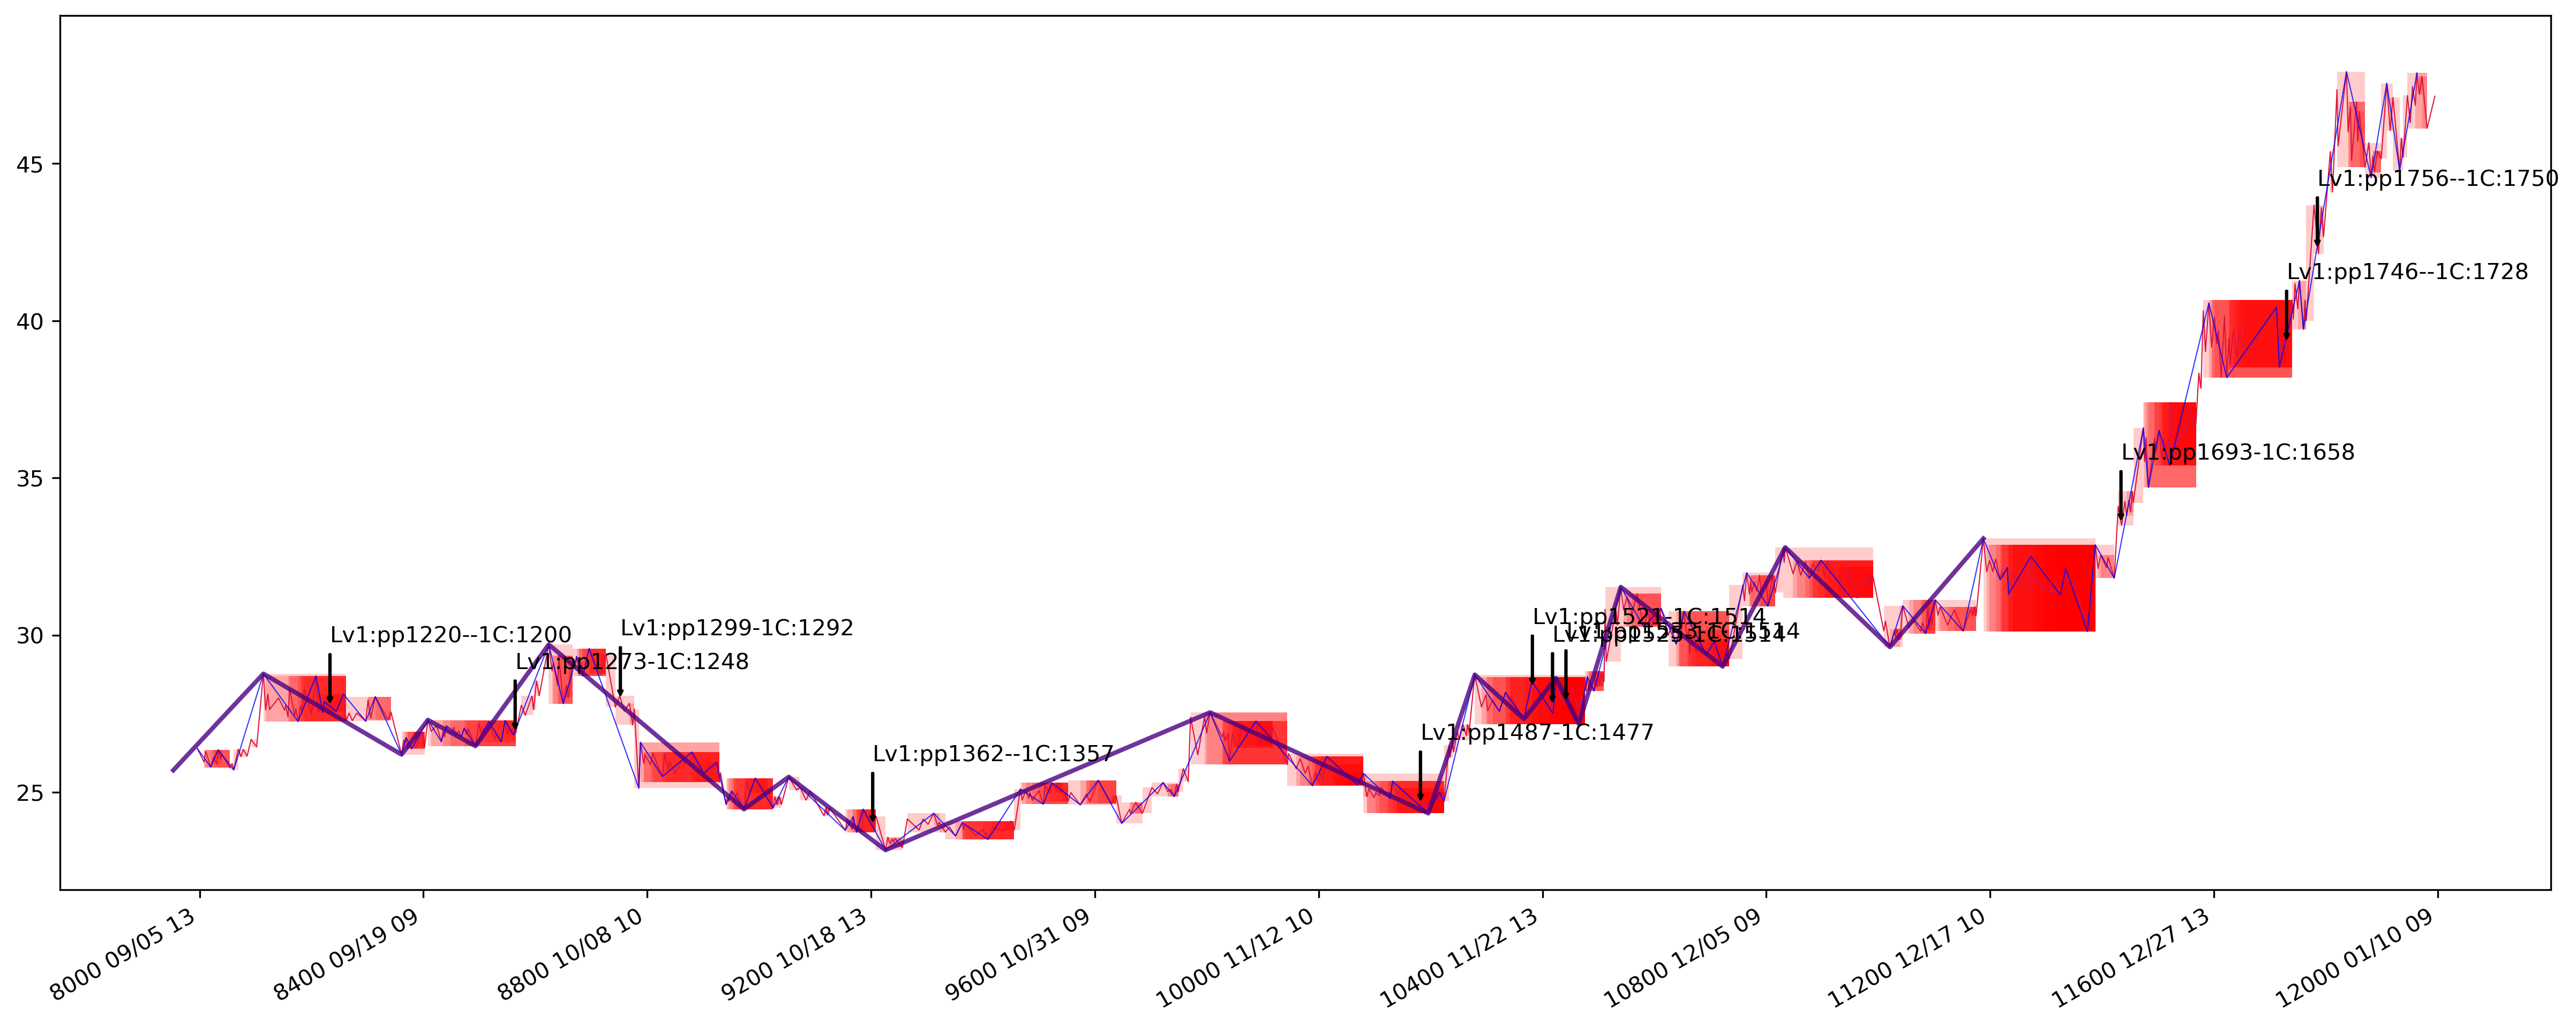

In [35]:
s_idx, e_idx = 8000,12000
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)

## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8, marker=False)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

center_list0 = [cc for cc in m.CLv0_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list0)
center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
#draw_center(ax, center_list1, facecolor='turquoise')

center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
#draw_center(ax, center_list2,  facecolor='indigo')

sig_list =[ss for ss in SIG_overlapMv.L if s_idx<=ss.TmInit <=e_idx]
for ss in sig_list:
    #ax.text(ss.TmInit, ss.sigV+1, ss.remark)
    ax.annotate(ss.remark, xy=(ss.TmInit, ss.sigV), xytext=(ss.TmInit, ss.sigV+2),
            arrowprops=dict(facecolor='black',headwidth=2,headlength=2, shrink=0.05, width=0.5),
            )
'''
pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)
'''

fig.autofmt_xdate()
plt.savefig('全景{0}_{1}.png'.format(str(int(s_idx)), str(int(e_idx))))

In [ ]:
[[m.Lv2_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.TmE, cc.is_main,cc.L,cc.H, cc.st_idxL[-8:]] for cc in m.CLv2_L]

In [ ]:
#[10323.0, 10367.0, 10419.0]

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=True)
#ax.text(11442,33.93,'33.93')
ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.savefig("image01.png")
plt.show()

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)